# Mathematical Underpinnings - Lab 1

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [95]:
# sampling from multivariate normal distribution and from Bernoulli

x = np.random.multivariate_normal(np.array([0,0]), np.eye(2), 5)
y = np.random.binomial(1, 0.5, 5)
x, y

(array([[-1.31709169, -0.54147296],
        [ 1.05425847, -0.50229015],
        [-0.6500835 , -1.36849958],
        [-0.38820384,  0.61267688],
        [-0.36710487,  0.05925599]]),
 array([1, 1, 0, 0, 0]))

In [96]:
m1 = np.array([1,1])
m2 = np.array([0,0])

sigma = np.array([[1, -0.5],[-0.5, 1]])

In [97]:
# sampling
Y_generative = np.concatenate((np.ones((1, 500)), np.zeros((1, 500))), axis=1)[0]
X_generative_1 = np.random.multivariate_normal(m1, sigma, 500)
X_generative_minus_1 = np.random.multivariate_normal(m2, sigma, 500)

X_generative = np.concatenate((X_generative_1, X_generative_minus_1), axis=0)

Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?


#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.

In [98]:
# computing beta_0 and beta using the formulas
pi = 1/2
b0 = np.log((pi)/(1 - pi)) + 1/2 * m2 @ np.linalg.inv(sigma) @ m2.T - 1/2 * m1 @ np.linalg.inv(sigma) @ m1.T
b = np.linalg.inv(sigma) @ (m2 - m1)

In [99]:
# a logistic model
mod_a = LogisticRegression(penalty="none")
mod_a.fit(X_generative, Y_generative)
print(f"estimated parameters:({mod_a.intercept_}, {mod_a.coef_}) ")
print(f"true parameters:({b0}, {b}) ")

estimated parameters:([-1.89338945], [[1.85114504 1.9628867 ]]) 
true parameters:(-2.0, [-2. -2.]) 


### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [100]:
# sampling
X_discriminative = np.array([[]])
mu = 0
for i in range(1000):
    chance = np.random.binomial(1, 0.5, 1)[0]
    if chance == 1:
        mu = m1[0]
    else:
        mu = m2[0]
    if i == 0:
        X_discriminative = np.random.multivariate_normal(np.array([mu, mu]), sigma, 1)
    else:
        X_discriminative = np.concatenate((X_discriminative, np.random.multivariate_normal(np.array([mu, mu]), sigma, 1)), axis = 0)

In [101]:
bern_probs = 1 / (1 + np.exp(-b0 + X_discriminative @ b))
Y_discriminative = np.random.binomial(1, bern_probs, len(bern_probs))

In [102]:
mod_b = LogisticRegression(penalty="none")
mod_b.fit(X_discriminative, Y_discriminative)

print(f"estimated parameters:({mod_b.intercept_}, {mod_b.coef_})")

estimated parameters:([-1.7973885], [[1.95831692 1.81312949]]) 


#### Second bullet point

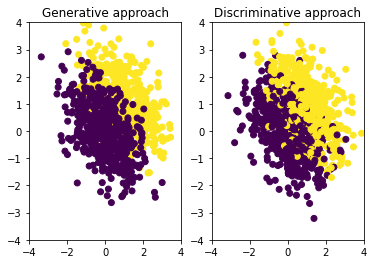

In [103]:
plt.subplot(1, 2, 1)
plt.scatter(X_generative[:, 0], X_generative[:, 1], c=Y_generative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.title("Generative approach")
plt.subplot(1, 2, 2)
plt.scatter(X_discriminative[:, 0], X_discriminative[:, 1] , c=Y_discriminative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.title("Discriminative approach")
plt.show()

What distinguishes the generative approach from the discriminative approach?

### c)

To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

Q1. A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.

In [104]:
# sampling

beta1 = 2

n1 = 1000
x1 = np.random.exponential(1, size=n1)

n2 = 2000
# I use Exp(beta1 + 1), because it is the p(x|y=-1) distribution as proved in homework below
x2 = np.random.exponential(1/(beta1+1), size=n2)

X = np.expand_dims(np.concatenate((x1, x2), axis=0), axis=1)
y = np.concatenate((np.ones((1, n1)), np.zeros((1, n2))), axis=1)[0]

### Logistic regression

In [105]:
mod = LogisticRegression(penalty="none")
mod.fit(X, y)

print(f"estimated parameters:({mod.intercept_}, {mod.coef_}) ")

estimated parameters:([-1.7725105], [[2.01653908]]) 


# Homework

Following the equation mentioned in the solution notebook:

$$p(x|y=-1) = \frac{\pi \exp(-x)}{\exp(\beta_0+\beta_1 x)(1-\pi)}$$


$$p(x|y=-1) = \frac{\pi}{1 - \pi}\exp(-\beta_0 - (1 + \beta_1)x)$$


$$p(x|y=-1) = \exp(-\beta_0)\frac{\pi}{1 - \pi}\cdot\exp(- (1 + \beta_1)x)\,\,\,\,\,\,[1]$$ 




$$\int_{0}^{\infty} \exp(-\beta_0)\frac{\pi}{1 - \pi}\cdot\exp(- (1 + \beta_1)x \,dx = 1$$


$$\exp(-\beta_0)\frac{\pi}{1 - \pi}\cdot\int_{0}^{\infty} \exp(- (1 + \beta_1)x \,dx = 1$$


$$\exp(-\beta_0)\frac{\pi}{1 - \pi} \cdot \frac{1}{\beta_1 + 1} = 1$$


$$\exp(-\beta_0)\frac{\pi}{1 - \pi} = \beta_1 + 1\,\,\,\,\,\,[2]$$


Thus from [1] and [2]:


$$p(x|y=-1) = (\beta_1 + 1)\exp(-1 + \beta_1x)$$


so we proved that:


$$C_{\beta_0, \pi} = \beta_1 + 1$$

and that $p(x|y=-1)$ is given with Exp($\beta_1 + 1$) distribution what is the answer for Q1


Now from [2]:


$$\beta_0 = - \log((\beta_1 + 1)\frac{\pi}{1 - \pi})$$

Regarding Q2: once we fix $\pi$ we have an apparent equation for $\beta_0$ depending on the $\beta_1$ so for each $\beta_1$ value we will have specific intercept value. So if we assume that $\beta_1$ is equal to 1 and $n_1$ and $n_2$ are fixed we do not have freedom to chose $\beta_0$, we must use calculated equation to get it. 

Regarding Q3:
Analogous for Q2, if we do not have $\pi$ fixed we do not have uniquely determined $\beta_0$.

In [106]:
pi = n1 / (n1 + n2)
b0 = -np.log((1 + beta1) * ((1-pi)/pi))
print(f"b0: {b0}, b1: {beta1}" )

b0: -1.7917594692280554, b1: 2


## Task 2

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [268]:
# def population_risk(a, sigma_eps):
#     return ...

### b)

In [269]:
# sampling

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [270]:
# def empirical_risk(a, x, y):
#     return ...

### c)

In [37]:
# code, plot

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [38]:
# excess risk
# ...

In [39]:
# simulations with fixed sample size

In [276]:
# simulations for various sample sizes

In [40]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)